<a href="https://colab.research.google.com/github/Anik85/Anik85/blob/main/cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d erhmrai/ecg-image-data

 98% 841M/858M [00:05<00:00, 183MB/s]
100% 858M/858M [00:05<00:00, 153MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/ecg-image-data.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, Activation , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.losses import categorical_crossentropy

In [5]:
'''import cv2
path =r'/content/ECG_Image_data/test/S/S1070.png'
x=plt.imread(path)
#x = cv2.merge((x,x,x))
print(x.shape)
plt.imshow(x)'''

"import cv2\npath =r'/content/ECG_Image_data/test/S/S1070.png'\nx=plt.imread(path)\n#x = cv2.merge((x,x,x))\nprint(x.shape)\nplt.imshow(x)"

In [6]:
'''train_dir = Path('/content/ECG_Image_data/train')

filepaths = list(train_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))


filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

dataframe = pd.concat([filepaths , labels] , axis=1)
dataframe'''

"train_dir = Path('/content/ECG_Image_data/train')\n\nfilepaths = list(train_dir.glob(r'**/*.png'))\nlabels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))\n\n\nfilepaths = pd.Series(filepaths, name='Filepath').astype(str)\nlabels = pd.Series(labels, name='Label')\n\ndataframe = pd.concat([filepaths , labels] , axis=1)\ndataframe"

In [7]:
#dataframe['Label'].value_counts()

In [8]:
'''samples = []
for category in dataframe['Label'].unique():
    category_slice = dataframe.query("Label == @category")
    samples.append(category_slice.sample(640, random_state=1))

dataframe_train = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
dataframe_train['Label'].value_counts()'''

'samples = []\nfor category in dataframe[\'Label\'].unique():\n    category_slice = dataframe.query("Label == @category")\n    samples.append(category_slice.sample(640, random_state=1))\n\ndataframe_train = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)\ndataframe_train[\'Label\'].value_counts()'

In [9]:
#dataframe_train

In [10]:
'''test_dir = Path('/content/ECG_Image_data/test')

filepaths = list(test_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

dataframe_test = pd.concat([filepaths , labels] , axis=1)
dataframe_test'''

"test_dir = Path('/content/ECG_Image_data/test')\n\nfilepaths = list(test_dir.glob(r'**/*.png'))\nlabels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))\n\nfilepaths = pd.Series(filepaths, name='Filepath').astype(str)\nlabels = pd.Series(labels, name='Label')\n\ndataframe_test = pd.concat([filepaths , labels] , axis=1)\ndataframe_test"

In [11]:
#dataframe_test['Label'].value_counts()

In [12]:
'''samples = []
for category in dataframe_test['Label'].unique():
    category_slice = dataframe_test.query("Label == @category")
    samples.append(category_slice.sample(160, random_state=1))

dataframe_test = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
dataframe_test['Label'].value_counts()'''

'samples = []\nfor category in dataframe_test[\'Label\'].unique():\n    category_slice = dataframe_test.query("Label == @category")\n    samples.append(category_slice.sample(160, random_state=1))\n\ndataframe_test = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)\ndataframe_test[\'Label\'].value_counts()'

In [13]:
#dataframe_test

In [14]:
'''from keras.utils import img_to_array,load_img
img = load_img(dataframe_test['Filepath'].values[1])
plt.imshow(img)
plt.axis("on")
plt.show()'''

'from keras.utils import img_to_array,load_img\nimg = load_img(dataframe_test[\'Filepath\'].values[1])\nplt.imshow(img)\nplt.axis("on")\nplt.show()'

In [15]:
labels=list()
path='/content/ECG_Image_data/train/'
os.listdir(path)
for i in os.listdir(path):
    labels.append(i)

In [16]:
labels

['Q', 'F', 'S', 'V', 'N', 'M']

In [17]:
Total_sample=0
for i in os.listdir(path):
    print(f'Length of :{i}= {len(os.listdir(os.path.join(path,i)))}')
    Total_sample+=len(os.listdir(os.path.join(path,i)))
print(f'Total Samples:{Total_sample}')

Length of :Q= 6431
Length of :F= 642
Length of :S= 2223
Length of :V= 5789
Length of :N= 75709
Length of :M= 8405
Total Samples:99199


In [18]:
#!pip install tqdm
from tqdm import tqdm

In [19]:
import skimage
import cv2
from skimage.io import imread,imshow
from skimage import transform
img_size=170     # 170x170
X=[] 
Y=[]
i=0
for idx,img in enumerate(os.listdir(path)):
    for img_name in tqdm(os.listdir(path+img)):
        if i<500:
            img_file=cv2.imread(path+img+'/'+img_name)
            if img_file is not None:
                img_file=transform.resize(img_file,(img_size,img_size,3))
                X.append(img_file)
                Y.append(idx)
        else:
            break
        i=i+1
    i=0
X=np.asarray(X)
Y=np.asarray(Y)

  6%|▌         | 500/8405 [00:07<02:06, 62.56it/s]


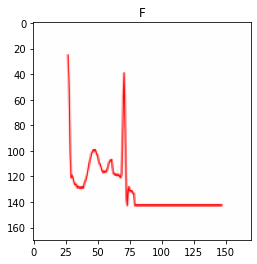

In [20]:
plt.imshow(X[601])
plt.title(labels[Y[601]])
plt.show()

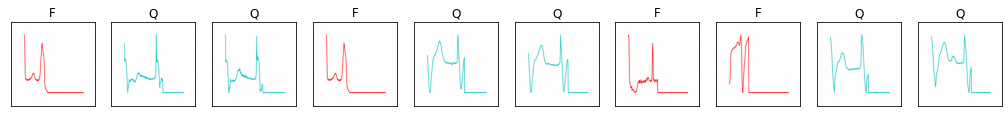

In [21]:
from random import randint
n = 50  # how many digits we will display
plt.figure(figsize=(90,40))
for i in range(10,20):
    # display original
    rn=randint(0,987)
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X[rn])
    plt.title(labels[Y[rn]])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y)

In [23]:
print('Shapes of Data Split into Train & Test Part')
print(f'Training Data->{X_train.shape},{Y_train.shape} Testing Data->{X_test.shape,Y_test.shape}')

Shapes of Data Split into Train & Test Part
Training Data->(2400, 170, 170, 3),(2400,) Testing Data->((600, 170, 170, 3), (600,))


In [24]:
from keras.utils.np_utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=len(labels))
Y_test=to_categorical(Y_test,num_classes=len(labels))

In [25]:
Y_train.shape,Y_test.shape

((2400, 6), (600, 6))

In [26]:
from tensorflow import keras
KerasModel = keras.models.Sequential([#bulid nn
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(170,170,3)),
        #1 convolutional layer 200filter each filter 3*3 relu  input 100*100*3 rgb
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
       #2 convolutional layer 150filter each filter 3*3 relu
        keras.layers.MaxPool2D(4,4),
        #3 maxpool layer 4*4
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),
        #4 convolutional layer 120filter each filter 3*3 relu
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'), 
        #5 convolutional layer 80filter each filter 3*3 relu
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        #6 convolutional layer 50filter each filter 3*3 relu
        keras.layers.MaxPool2D(4,4),#7 maxpool layer 4*4
        keras.layers.Flatten(),  #make the matrix flate
        keras.layers.Dense(120,activation='relu') , #hidden layer (120cell)   
        keras.layers.Dense(100,activation='relu') , #hidden layer (100cell)
        keras.layers.Dense(50,activation='relu') ,  #hidden layer (50cell)      
        keras.layers.Dropout(rate=0.5) , 
        #drop some nuron 50% reduces the number of connections to increase speed and reduces the overfit
        keras.layers.Dense(6,activation='softmax') ,  #output layer 6  
    ])
KerasModel.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
KerasModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 168, 168, 200)     5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 166, 166, 150)     270150    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 41, 41, 150)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 120)       162120    
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 80)        86480     
                                                                 
 conv2d_4 (Conv2D)           (None, 35, 35, 50)        36050     
                                                        

In [27]:
history=KerasModel.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=20,batch_size=32,verbose=1)

Epoch 1/20
75/75 [==============================] - 39s 346ms/step - loss: 1.6209 - accuracy: 0.2596 - val_loss: 1.3474 - val_accuracy: 0.3567
Epoch 2/20
75/75 [==============================] - 24s 323ms/step - loss: 0.9393 - accuracy: 0.6125 - val_loss: 0.4462 - val_accuracy: 0.9617
Epoch 3/20
75/75 [==============================] - 24s 323ms/step - loss: 0.3650 - accuracy: 0.8608 - val_loss: 0.0851 - val_accuracy: 1.0000
Epoch 4/20
75/75 [==============================] - 24s 320ms/step - loss: 1.1266 - accuracy: 0.6025 - val_loss: 0.9252 - val_accuracy: 0.6517
Epoch 5/20
75/75 [==============================] - 24s 320ms/step - loss: 0.8569 - accuracy: 0.6183 - val_loss: 0.4757 - val_accuracy: 0.7883
Epoch 6/20
75/75 [==============================] - 24s 321ms/step - loss: 0.7912 - accuracy: 0.6308 - val_loss: 0.4956 - val_accuracy: 0.7950
Epoch 7/20
75/75 [==============================] - 24s 320ms/step - loss: 0.6468 - accuracy: 0.6892 - val_loss: 0.3696 - val_accuracy: 0.8233

In [28]:
path2='/content/ECG_Image_data/test/'
img_size=170     # 170x170
X_test=[] 
Y_test=[]
i=0
for idx,img in enumerate(os.listdir(path2)):
    for img_name in tqdm(os.listdir(path2+img)):
        if i<300:
            img_file=cv2.imread(path2+img+'/'+img_name)
            if img_file is not None:
                img_file=transform.resize(img_file,(img_size,img_size,3))
                X_test.append(img_file)
                Y_test.append(idx)
        else:
            break
        i=i+1
    i=0
x_test=np.asarray(X_test)
y_test=np.asarray(Y_test)

 14%|█▍        | 300/2101 [00:04<00:28, 63.64it/s]


In [29]:
y_test=to_categorical(y_test,num_classes=len(labels))
print(KerasModel.evaluate(x_test,y_test))

52/52 [==============================] - 7s 141ms/step - loss: 0.2305 - accuracy: 0.9272
[0.2304784208536148, 0.9271523356437683]


In [30]:
results = KerasModel.evaluate(x_test,y_test)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

52/52 [==============================] - 6s 109ms/step - loss: 0.2305 - accuracy: 0.9272
Test Loss: 0.23048
Test Accuracy: 92.72%


Text(0, 0.5, 'loss')

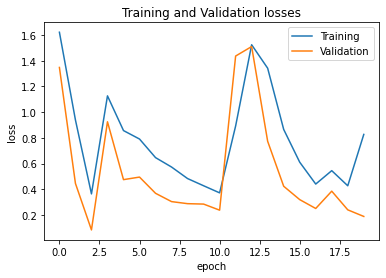

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.ylabel('loss')
     

Text(0, 0.5, 'accuracy')

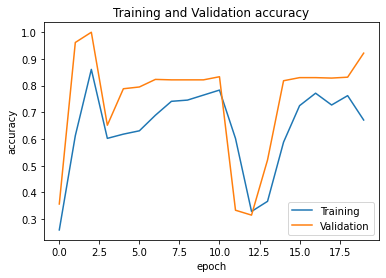

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
     

52/52 [==============================] - 5s 104ms/step


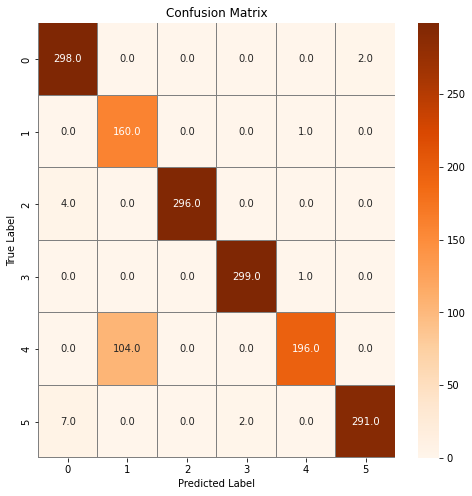

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

Y_pred = KerasModel.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Oranges",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [34]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       300
           1       0.61      0.99      0.75       161
           2       1.00      0.99      0.99       300
           3       0.99      1.00      1.00       300
           4       0.99      0.65      0.79       300
           5       0.99      0.97      0.98       300

    accuracy                           0.93      1661
   macro avg       0.92      0.93      0.91      1661
weighted avg       0.95      0.93      0.93      1661

